In [105]:
###regression vs classification task
#supervised(has the label or target as part of the data set) and unsupervised(the label or target of the model is part of the model) learning.
#underfitting vs. overfitting.
#Underfitting: Test error iis lower than training error
#Overfitting: Training error is much lower than test error. The model crams the data but doesn't really nderstand it

#scaling, helps to reduce values to sizeable bits, mostly using a ratio
#normalisation, data - mean/range

In [106]:
##importing important libs for project

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [108]:
data = pd.read_csv('flights_data.csv')

In [109]:
data.head

<bound method NDFrame.head of          airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai        Morning   one        Evening   

       destination_city     class  duration  

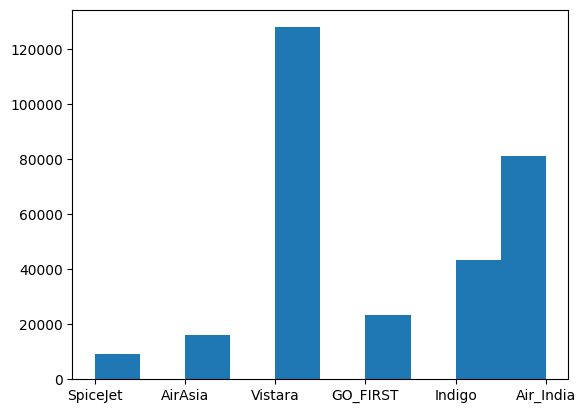

In [110]:
plt.hist(data['airline']);

In [111]:
source_city_price = data.groupby('source_city')
source_city_price.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
43027,Vistara,UK-994,Mumbai,Morning,zero,Afternoon,Delhi,Economy,2.25,1,5943
43028,Vistara,UK-910,Mumbai,Evening,zero,Evening,Delhi,Economy,2.17,1,6048
43029,GO_FIRST,G8-339,Mumbai,Evening,zero,Night,Delhi,Economy,2.17,1,5942
43030,Indigo,6E-6004,Mumbai,Evening,zero,Night,Delhi,Economy,2.08,1,5943
43031,Indigo,6E-2077,Mumbai,Afternoon,zero,Afternoon,Delhi,Economy,2.17,1,5943


In [112]:
source_city_price['price'].head()

0          5953
1          5953
2          5956
3          5955
4          5955
43027      5943
43028      6048
43029      5942
43030      5943
43031      5943
84065      7489
84066      7489
84067      7489
84068      7488
84069      7488
119685     6488
119686     6353
119687     6353
119688     6353
119689     6489
152559     8393
152560     8393
152561    11698
152562    11488
152563    11591
180495    15752
180496    18902
180497    20268
180498     7352
180499     7352
Name: price, dtype: int64

<BarContainer object of 6 artists>

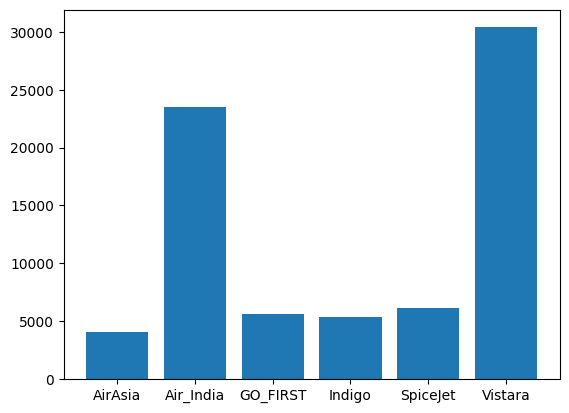

In [113]:
airline_group = data.groupby('airline')['price'].mean()

plt.bar(airline_group.keys(), airline_group.values)

In [114]:
airline_group

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

In [115]:
airline_group.keys()

Index(['AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara'], dtype='object', name='airline')

In [116]:
airline_group.values

array([ 4091.07274196, 23507.0191119 ,  5652.00759505,  5324.21630334,
        6179.27888137, 30396.53630171])

In [117]:
data['class'].unique()

array(['Economy', 'Business'], dtype=object)

<BarContainer object of 2 artists>

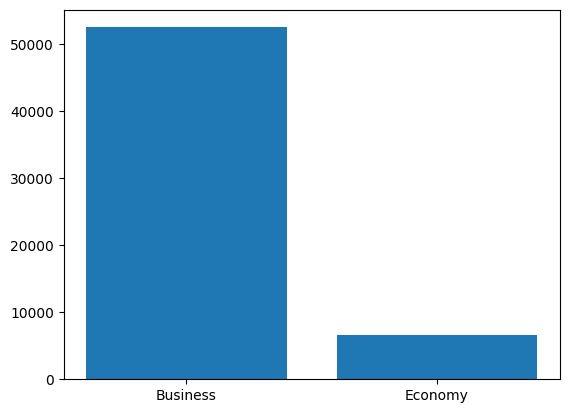

In [118]:
flight_class_price = data.groupby('class')['price'].mean()
plt.bar(flight_class_price.keys(), flight_class_price.values)

In [119]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [120]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [121]:
#data.groupby('price').

In [122]:
data.corr()
#sgows the positive or negative correlation between two columns in a dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_6804\3718897703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [123]:
data.departure_time.unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [124]:
#Converting strings to numbers using dictionaries and .map() function

departure_map = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}

departure_map['Early_Morning'] = 300
print(departure_map)

{'Early_Morning': 300, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late_Night': 5}


In [125]:
departure_map['Early_Evening'] = 80
departure_map['Early_Morning'] = 0
departure_map


{'Early_Morning': 0,
 'Morning': 1,
 'Afternoon': 2,
 'Evening': 3,
 'Night': 4,
 'Late_Night': 5,
 'Early_Evening': 80}

In [126]:
departure_map
data.departure_time.map(departure_map)

0         3
1         0
2         0
3         1
4         1
         ..
300148    1
300149    2
300150    0
300151    0
300152    1
Name: departure_time, Length: 300153, dtype: int64

In [127]:
#This is how you can update a dictionary
data['departure_time'] = data.departure_time.map(departure_map)

In [128]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,3,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,0,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,0,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,1,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,1,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,1,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,2,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,0,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,0,one,Evening,Hyderabad,Business,10.00,49,81585


In [129]:
for i in data.flight.unique():
    print(i)

SG-8709
SG-8157
I5-764
UK-995
UK-963
UK-945
UK-927
UK-951
G8-334
G8-336
G8-392
G8-338
6E-5001
6E-6202
6E-549
6E-6278
AI-887
AI-665
I5-747
G8-266
G8-101
G8-103
AI-441
6E-5328
UK-933
6E-2046
I5-744
SG-8169
6E-5041
G8-165
6E-2373
UK-813
UK-817
UK-819
UK-801
UK-815
AI-453
SG-2976
AI-504
AI-502
AI-506
AI-803
AI-479
SG-339
UK-955
UK-627
I5-784
AI-9643
AI-540
AI-429
AI-439
AI-9645
6E-2193
6E-2168
6.00E-152
6E-369
UK-899
AI-764
UK-747
UK-809
UK-737
6E-2338
G8-237
UK-871
AI-762
G8-1404
AI-512
AI-537
UK-977
6.00E-184
SG-3002
6E-2102
AI-801
UK-637
UK-835
AI-531
UK-705
UK-707
UK-673
AI-839
UK-879
G8-191
AI-767
AI-401
AI-473
G8-213
AI-409
UK-837
AI-877
SG-8803
UK-985
UK-953
G8-346
G8-330
G8-323
6.00E-218
6E-6722
AI-868
AI-805
AI-624
G8-188
AI-636
6E-2022
AI-469
AI-542
AI-560
UK-683
AI-403
6E-2154
AI-9843
AI-544
6.00E-282
UK-859
UK-829
AI-9857
6E-607
AI-885
SG-2277
G8-719
G8-119
G8-717
UK-706
AI-465
6E-5018
UK-839
UK-833
AI-406
AI-9809
G8-286
UK-847
AI-411
G8-113
SG-8483
AI-475
6.00E-181
6E-2092
AI-

In [130]:
data.drop('flight', axis=1, inplace=True)

In [131]:
data['airline'].unique()


array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [132]:
airline_map = {
    'SpiceJet': 1,
    'AirAsia': 2,
    'Vistara': 3,
    'GO_FIRST': 4,
    'Indigo': 5,
    'Air_India': 6
}

In [133]:
data['airline'] = data.airline.map(airline_map)

In [134]:
data.head(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Delhi,3,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,Delhi,0,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,Delhi,0,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Delhi,1,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,3,Delhi,1,zero,Morning,Mumbai,Economy,2.33,1,5955
5,3,Delhi,1,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,3,Delhi,1,zero,Morning,Mumbai,Economy,2.08,1,6060
7,3,Delhi,2,zero,Evening,Mumbai,Economy,2.17,1,6060
8,4,Delhi,0,zero,Morning,Mumbai,Economy,2.17,1,5954
9,4,Delhi,2,zero,Evening,Mumbai,Economy,2.25,1,5954


In [135]:
data.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [136]:
data.source_city = data.source_city.astype('category')

data.source_city = data.source_city.cat.codes
#Use when dataset is large

In [137]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,2,3,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,2,0,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,2,0,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,2,1,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,3,2,1,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,3,1,1,one,Evening,Hyderabad,Business,10.08,49,69265
300149,3,1,2,one,Night,Hyderabad,Business,10.42,49,77105
300150,3,1,0,one,Night,Hyderabad,Business,13.83,49,79099
300151,3,1,0,one,Evening,Hyderabad,Business,10.00,49,81585


In [138]:
data.stops.unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [139]:
stops_mapper = {
    'zero': 0,
    'one': 1,
    'two_or_more': 2
}
data.stops = data.stops.map(stops_mapper)

In [140]:
import sklearn as sklearn

In [141]:
from sklearn.preprocessing import OneHotEncoder


In [142]:
from sklearn.preprocessing import LabelEncoder
#Use when dataset is large
enc = LabelEncoder()
data['arrival_time'] = enc.fit_transform(data['arrival_time'])
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,2,3,0,5,Mumbai,Economy,2.17,1,5953
1,1,2,0,0,4,Mumbai,Economy,2.33,1,5953
2,2,2,0,0,1,Mumbai,Economy,2.17,1,5956
3,3,2,1,0,0,Mumbai,Economy,2.25,1,5955
4,3,2,1,0,4,Mumbai,Economy,2.33,1,5955


In [143]:
from sklearn.preprocessing import LabelEncoder
#Use when dataset is large
enc = LabelEncoder()
data['destination_city'] = enc.fit_transform(data['destination_city'])

data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,2,3,0,5,5,Economy,2.17,1,5953
1,1,2,0,0,4,5,Economy,2.33,1,5953
2,2,2,0,0,1,5,Economy,2.17,1,5956
3,3,2,1,0,0,5,Economy,2.25,1,5955
4,3,2,1,0,4,5,Economy,2.33,1,5955


In [144]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
data['class'] = enc.fit_transform(data['class'])

data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,2,3,0,5,5,1,2.17,1,5953
1,1,2,0,0,4,5,1,2.33,1,5953
2,2,2,0,0,1,5,1,2.17,1,5956
3,3,2,1,0,0,5,1,2.25,1,5955
4,3,2,1,0,4,5,1,2.33,1,5955


In [145]:
from sklearn.model_selection import train_test_split

features = data.drop('price', axis=1)
target = data['price']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=80)

In [146]:
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
235921,6,5,3,1,2,4,0,24.83,24
94563,5,0,0,1,0,5,1,6.25,5
166414,3,3,2,1,5,0,1,9.92,11
240260,6,5,2,1,5,3,0,8.00,33
56020,3,5,1,1,0,0,1,4.58,20
...,...,...,...,...,...,...,...,...,...
186371,5,1,1,1,2,2,1,7.67,42
100563,3,0,1,1,5,5,1,10.08,37
281510,6,3,4,1,4,0,0,12.92,24
38076,4,2,4,1,1,1,1,10.67,20


In [147]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
#decisiontree regressor/classifier

In [148]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [149]:
from sklearn.metrics import r2_score

In [150]:
prediction = model.predict(x_train)

In [151]:
score = r2_score(y_train, prediction)
print (round(score*100, 2))

99.93


In [152]:
x_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
235921,6,5,3,1,2,4,0,24.83,24
94563,5,0,0,1,0,5,1,6.25,5
166414,3,3,2,1,5,0,1,9.92,11
240260,6,5,2,1,5,3,0,8.00,33
56020,3,5,1,1,0,0,1,4.58,20


In [153]:

y_train.head()

235921    45230
94563      5635
166414     8062
240260    45693
56020      4006
Name: price, dtype: int64

In [154]:
x_train.to_csv('train.csv')

In [155]:

manual_prediction = model.predict([[6,5,3,1,2,4,0,24.83,24]])
manual_prediction

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([45230.])

In [156]:
test_pred = model.predict(x_test)
test_score = r2_score(y_test, test_pred)
print('Model Score on Training Data: ', round(score*100, 2))
print('Model score on Test Data: ', round((test_score *100), 2))

Model Score on Training Data:  99.93
Model score on Test Data:  97.76
